# 2차 함수 모델 fiiting하기

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 데이터 생성하기

In [2]:
# function
# non-linear function, 2차 함수 모델(Quadratic Model), dimension : 3
f = lambda x: x**2 + 1.0/3.0 * x + 5.0

In [3]:
x = np.linspace(-20, 60, 50)
fx = f(x)

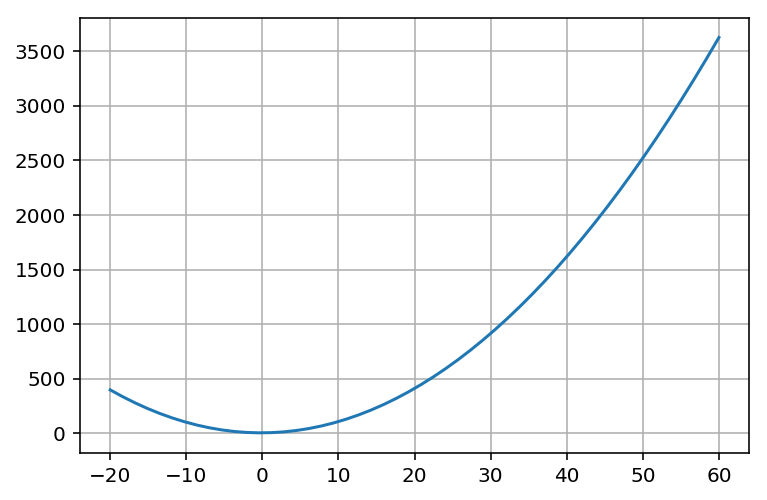

In [4]:
plt.plot(x,fx)
plt.grid()
plt.show()

In [5]:
np.random.seed(1)
y = fx + 500 * np.random.rand(len(x))

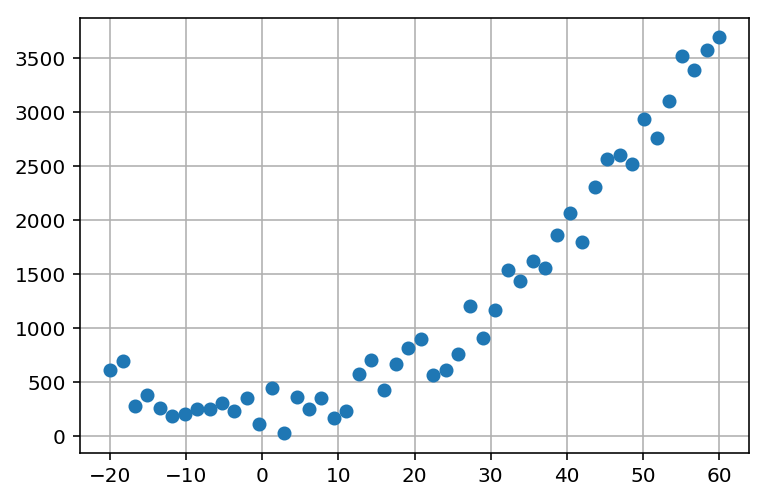

In [6]:
plt.plot(x,y, 'o')
plt.grid()
plt.show()

\begin{equation}
loss(w) = \frac{1}{N}\sum_{i=1}^N |w_0 x_i^2 + w_1x_i + w_2 - y_i|^2
\end{equation}

In [12]:
loss = lambda w: np.mean((w[0] * x ** 2 + w[1] * x + w[2] - y)**2)
# 분모에 N 을 취하는 이유가 나옴(계산 편의)

## 1. scipy.optimize 사용하기
1. Define loss function
1. Call `minimize()`


In [16]:
from scipy.optimize import minimize
w0 = [0.0, 2.0, 1.0]
res = minimize(loss, w0)

In [17]:
wopt = res.x
print(wopt)
y_pred = wopt[0] * x ** 2 + wopt[1] * x + wopt[2]

[  1.05035006  -0.39976119 236.98480454]


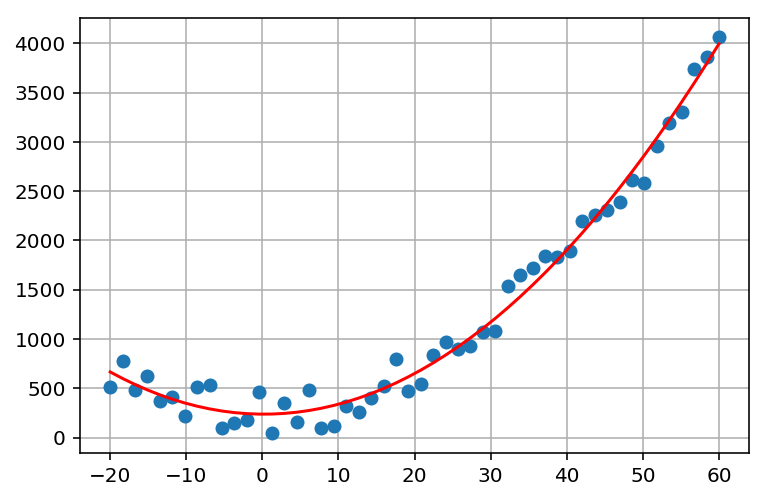

In [18]:
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.show()

# x, y 값는 주어진 데이터
# 최적화 하려는 것은 loss function(least squars of error)
# 최적화 결과의 cost 를 x,y 에 넣은 것이 빨간선(predicted line)

## 2. Steepest Descent 사용하기
1. Define gradient
1. Write code for Steepest Descent 3d
1. Tune Parameters

\begin{equation}
loss(w) = \frac{1}{N}\sum_{i=1}^N |w_0 x_i^2 + w_1x_i + w_2 - y_i|^2
\end{equation}

\begin{equation}
\nabla loss(w) =
\frac{2}{N}\sum_{i=1}^N
(w_0 x_i^2 + w_1x_i + w_2 - y_i)
\begin{bmatrix}
x_i^2\\
x_i\\
1
\end{bmatrix}
\end{equation}

1. 하고자 하는 것 : loss function 에 대한 최적화 (w0, w1, w2 찾기)
1. x,y 데이터는 주어져 있음 (함수의 형태를 이용해 least square 하는 loss function 도출됨)
1. w0, w1, w2 를 f 에 넣어 나온 predicted value 를 그림에 그려 비교해 본다

In [13]:
def grad_f(w):
    val = np.zeros(len(w))
    for i in range(len(x)):   # x 에 대해 다 돈다
        er = w[0] * x[i] ** 2 + w[1] * x[i] + w[2] - y[i] # 각 xi 에 대한 error 가 scalar 로 계산
        val += 2. * np.array([x[i]**2, x[i], 1]) * er   # val(3,1) 에 결과값을 누적합
    return val / len(x)                                 # N 으로 나눠 최종 리턴

In [19]:
def steepest_descent_3d(loss, grad_func, w0, learning_rate=0.01, MaxIter=10):
    for i in range(MaxIter):
        w0 += -learning_rate * grad_func(w0)
    return w0

In [13]:
w_gd = steepest_descent_3d(loss, grad_f, w0, learning_rate=2E-7,MaxIter=7000)
print(w_gd)

[1.06134805 2.98512203 1.35311147]


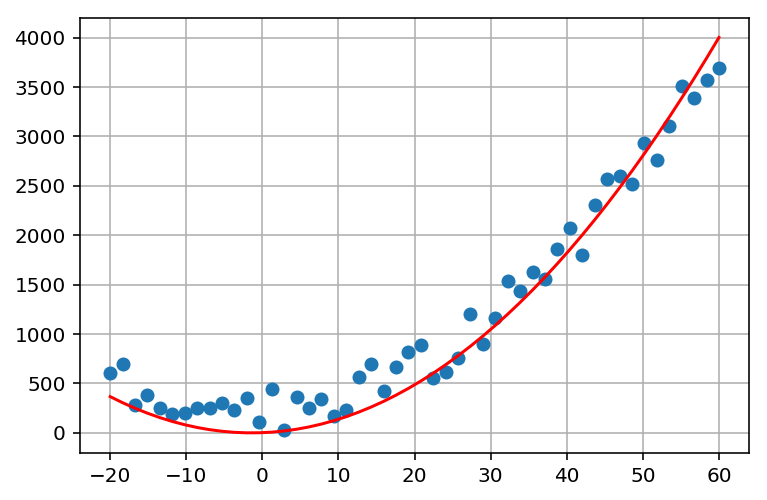

In [14]:
y_pred = w_gd[0] * x ** 2 + w_gd[1] * x + w_gd[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.show()
# 모양상으로는 밑으로 좀 쳐져 있도록 피팅이 되었다. 다른 방법 시도해 보기

## 3. Newton Method 사용하기
1. Define gradient and hessian matrix
1. Write code for Newton method for 3d
1. Tune Parameter

\begin{equation}
loss(w) = \frac{1}{N}\sum_{i=1}^N |w_0 x_i^2 + w_1x_i + w_2 - y_i|^2
\end{equation}

\begin{equation}
\nabla loss(w) =
\frac{2}{N}\sum_{i=1}^N
(w_0 x_i^2 + w_1x_i + w_2 - y_i)
\begin{bmatrix}
x_i^2\\
x_i\\
1
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla^2 loss(w) =
\frac{2}{N}\sum_{i=1}^N
\begin{bmatrix}
x_i^4 & x_i^3 & x_i^2\\
x_i^3 & x_i^2 & x_i\\
x_i^2 & x_i & 1
\end{bmatrix}
\end{equation}

In [22]:
def hessian_f(w):
    val = np.zeros((len(w),len(w)))
    for i in range(len(x)):
        val += 2. * np.array([[x[i]**4, x[i]**3, x[i]**2], [x[i]**3,x[i]**2,x[i]], [x[i]**2,x[i],1]])
    return val / len(x)

In [23]:
def newton_descent_3d(loss, grad_func, hessian_func, w0, learning_rate=1, MaxIter=10):
    for i in range(MaxIter):
        grad = grad_func(w0)
        hess = hessian_func(w0)
        w0 += -learning_rate * np.linalg.solve(hess,grad)
    return w0

In [17]:
w_nt = newton_descent_3d(loss, grad_f, hessian_f, w0, MaxIter=1)

In [26]:
w_nt # 리턴된 weight 값

array([  1.05035012,  -0.39976496, 236.98486218])

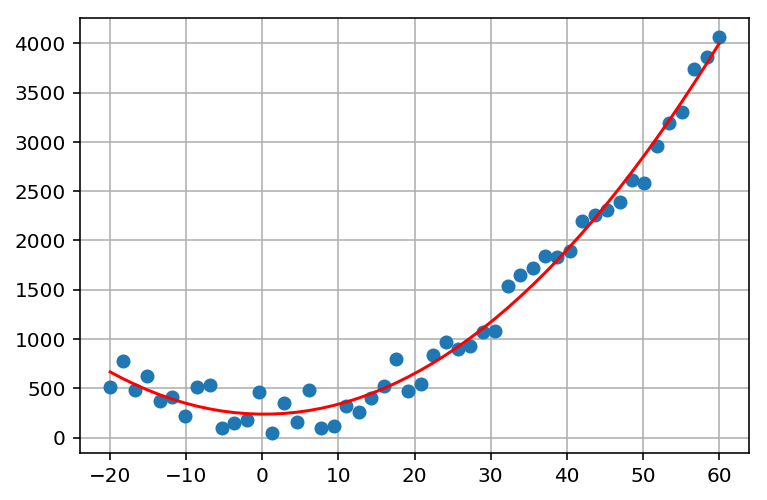

In [27]:
y_pred = w_nt[0] * x ** 2 + w_nt[1] * x + w_nt[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.show()

# steepest descent 보다 좀더 피팅이 된 모습임

## 4. 3가지 방법 비교

In [20]:
loss(wopt), loss(w_gd), loss(w_nt)
# 여기서는 steepest gradient 가 성능이 현저히 떨어지는 모습을 보임

(21593.22696782714, 50142.655521489236, 21593.226967824558)

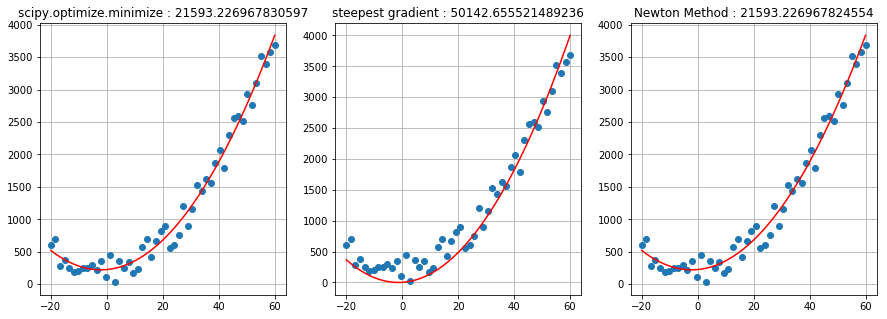

In [20]:
plt.subplots(3, figsize=(15,5))
plt.subplot(131)
y_pred = wopt[0] * x ** 2 + wopt[1] * x + wopt[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('scipy.optimize.minimize : {0}'.format(loss(wopt)))

plt.subplot(132)
y_pred = w_gd[0] * x ** 2 + w_gd[1] * x + w_gd[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('steepest gradient : {0}'.format(loss(w_gd)))

plt.subplot(133)
y_pred = w_nt[0] * x ** 2 + w_nt[1] * x + w_nt[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('Newton Method : {0}'.format(loss(w_nt)))
plt.show()

## 5. Scaling의 중요성
Data Scaling은 steepest descent의 속도에 굉장히 중요한 역할을 합니다.

In [30]:
loss = lambda w: np.mean((w[0] * x ** 2 + w[1] * x + w[2] - y)**2)
def grad_f(w):
    val = np.zeros(len(w))
    for i in range(len(x)):
        er = w[0] * x[i] ** 2 + w[1] * x[i] + w[2] - y[i]
        val += 2. * np.array([x[i]**2, x[i], 1]) * er
    return val / len(x)

`learning_rate`를 `2E-6`으로 설정하면, 수렴하지 않습니다.

In [31]:
w_gd = steepest_descent_3d(loss, grad_f, w0, learning_rate=2E-6,MaxIter=7000)
print(w_gd)
# rate 를 올렸을 때 터져버림.
# 왜? scaling 을 안해줬기 때문. 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in add
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in add
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in add
  This is separate from the ipykernel package so we can avoid doing imports until


[nan nan nan]


`learning_rate`를 `2E-7`으로 설정하면, 수렴하고 있지만, 너무 느립니다.

In [32]:
w_gd = steepest_descent_3d(loss, grad_f, w0, learning_rate=2E-7,MaxIter=7000)
print(w_gd)

[1.11734016 1.72923179 1.36188937]


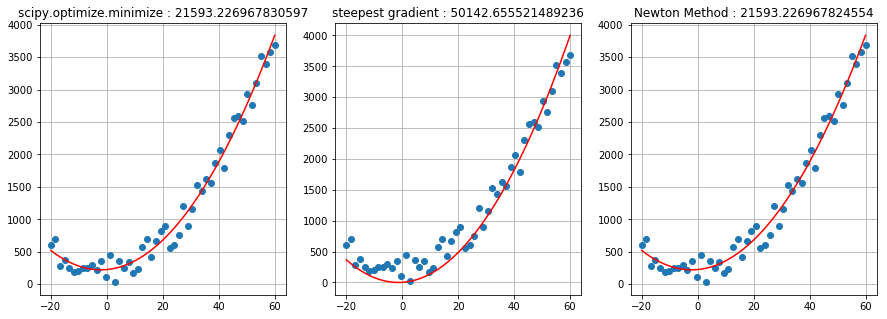

In [24]:
plt.subplots(3, figsize=(15,5))
plt.subplot(131)
y_pred = wopt[0] * x ** 2 + wopt[1] * x + wopt[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('scipy.optimize.minimize : {0}'.format(loss(wopt)))

plt.subplot(132)
y_pred = w_gd[0] * x ** 2 + w_gd[1] * x + w_gd[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('steepest gradient : {0}'.format(loss(w_gd)))

plt.subplot(133)
y_pred = w_nt[0] * x ** 2 + w_nt[1] * x + w_nt[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('Newton Method : {0}'.format(loss(w_nt)))
plt.show()

그래서 다른 method들에 비해 현저히 느립니다.

이러한 현상은 scaling을 함으로써 해결할 수 있습니다.

In [25]:
m = np.mean(x)
stdvar = np.sqrt(np.var(x))
scaled_x = (x-m) / stdvar
print(scaled_x)

[-1.69774938 -1.62845348 -1.55915759 -1.4898617  -1.4205658  -1.35126991
 -1.28197402 -1.21267813 -1.14338223 -1.07408634 -1.00479045 -0.93549455
 -0.86619866 -0.79690277 -0.72760688 -0.65831098 -0.58901509 -0.5197192
 -0.4504233  -0.38112741 -0.31183152 -0.24253563 -0.17323973 -0.10394384
 -0.03464795  0.03464795  0.10394384  0.17323973  0.24253563  0.31183152
  0.38112741  0.4504233   0.5197192   0.58901509  0.65831098  0.72760688
  0.79690277  0.86619866  0.93549455  1.00479045  1.07408634  1.14338223
  1.21267813  1.28197402  1.35126991  1.4205658   1.4898617   1.55915759
  1.62845348  1.69774938]


In [34]:
loss_scaled = lambda w: np.mean((w[0] * scaled_x ** 2 + w[1] * scaled_x + w[2] - y)**2)
def grad_f_scaled(w):
    val = np.zeros(len(w))
    for i in range(len(x)):
        er = w[0] * scaled_x[i] ** 2 + w[1] * scaled_x[i] + w[2] - y[i]
        val += 2. * np.array([scaled_x[i]**2, scaled_x[i], 1]) * er
    return val / len(scaled_x)

In [35]:
w_gd1 = steepest_descent_3d(loss_scaled, grad_f_scaled, w0, learning_rate=2E-1,MaxIter=30)
print(w_gd1)
# MaxIter 가 훨씬 적고, learning_rate 를 크게 잡아도 가능. 훨씬 빠르게.

[584.91293084 980.4563924  646.38143576]


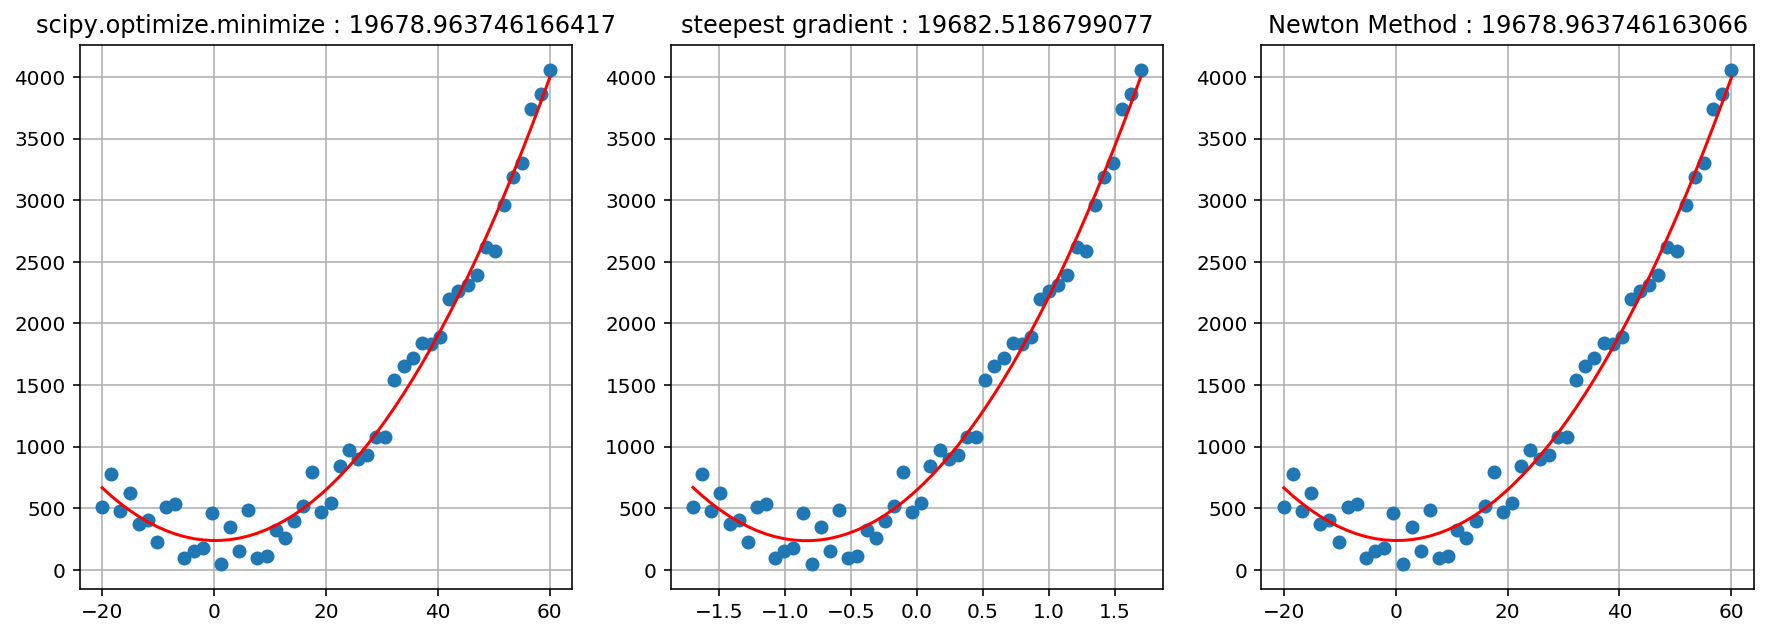

In [36]:
plt.subplots(3, figsize=(15,5))
plt.subplot(131)
y_pred = wopt[0] * x ** 2 + wopt[1] * x + wopt[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('scipy.optimize.minimize : {0}'.format(loss(wopt)))

plt.subplot(132)
y_pred = w_gd1[0] * scaled_x ** 2 + w_gd1[1] * scaled_x + w_gd1[2]
plt.plot(scaled_x,y, 'o')
plt.plot(scaled_x,y_pred, 'r-')
plt.grid()
plt.title('steepest gradient : {0}'.format(loss_scaled(w_gd1)))

plt.subplot(133)
y_pred = w_nt[0] * x ** 2 + w_nt[1] * x + w_nt[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('Newton Method : {0}'.format(loss(w_nt)))
plt.show()

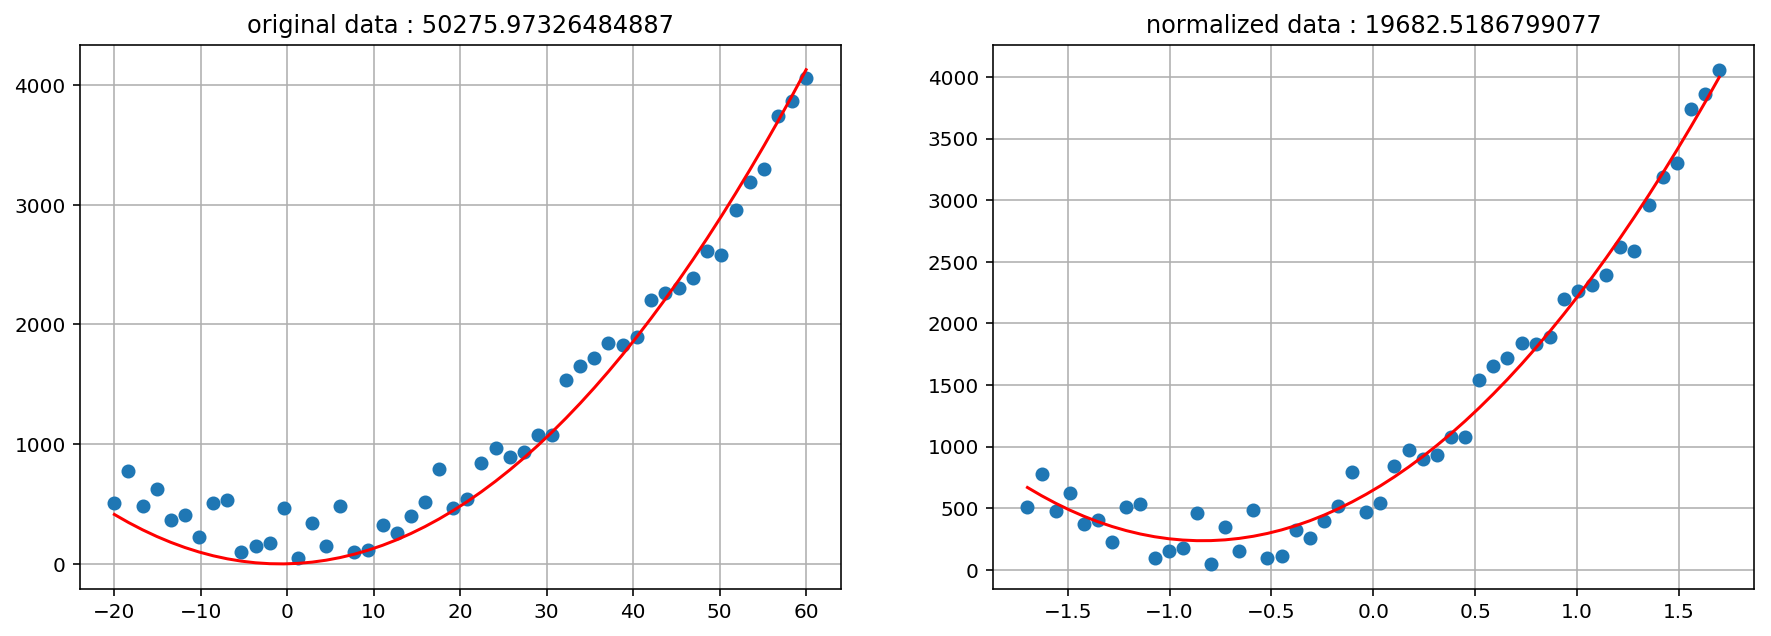

In [37]:
plt.subplots(2, figsize=(15,5))
plt.subplot(121)
y_pred = w_gd[0] * x ** 2 + w_gd[1] * x + w_gd[2]
plt.plot(x,y, 'o')
plt.plot(x,y_pred, 'r-')
plt.grid()
plt.title('original data : {0}'.format(loss(w_gd)))

plt.subplot(122)
y_pred = w_gd1[0] * scaled_x ** 2 + w_gd1[1] * scaled_x + w_gd1[2]
plt.plot(scaled_x,y, 'o')
plt.plot(scaled_x,y_pred, 'r-')
plt.grid()
plt.title('normalized data : {0}'.format(loss_scaled(w_gd1)))
plt.show()

|  | Original Data   | Normalized Data |
|------|------|------|
|   iteration 횟수  | 7000|30|
|   learning_rate | 2E-7|0.2|
|   loss  | 50142|21599|

단지 scaling을 함으로써 훨씬 빠르고 정확한 model을 찾아낼 수 있습니다.